In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [2]:
path = "/Users/nico_marais/code/Liedjieboer/forward_farming_big_datasets/winemag-data-130k-v2.csv"

In [3]:
# Load in the dataframe
df = pd.read_csv(path, index_col=0)

In [4]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df[["country", "description","points"]].head()
df["country"].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [6]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country

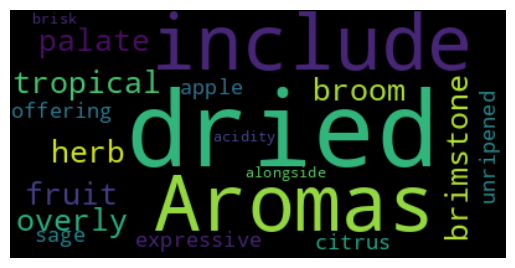

In [7]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


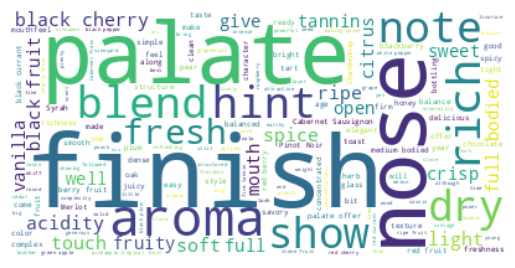

In [9]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
country.size().sort_values(ascending=False).head()

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

In [11]:
country.size().sort_values(ascending=False).head(20)

country
US              54504
France          22093
Italy           19540
Spain            6645
Portugal         5691
Chile            4472
Argentina        3800
Austria          3345
Australia        2329
Germany          2165
New Zealand      1419
South Africa     1401
Israel            505
Greece            466
Canada            257
Hungary           146
Bulgaria          141
Romania           120
Uruguay           109
Turkey             90
dtype: int64

In [12]:
# Join all reviews of each country:
usa = " ".join(review for review in df[df["country"]=="US"].description)
fra = " ".join(review for review in df[df["country"]=="France"].description)
ita = " ".join(review for review in df[df["country"]=="Italy"].description)
spa = " ".join(review for review in df[df["country"]=="Spain"].description)
por = " ".join(review for review in df[df["country"]=="Portugal"].description)
chi = " ".join(review for review in df[df["country"]=="Chile"].description)
arg = " ".join(review for review in df[df["country"]=="Argentina"].description)
aus = " ".join(review for review in df[df["country"]=="Australia"].description)
ger = " ".join(review for review in df[df["country"]=="Germany"].description)
nz = " ".join(review for review in df[df["country"]=="New Zealand"].description)
rsa = " ".join(review for review in df[df["country"]=="South Africa"].description)
isr = " ".join(review for review in df[df["country"]=="Israel"].description)
grc = " ".join(review for review in df[df["country"]=="Greece"].description)
can = " ".join(review for review in df[df["country"]=="Canada"].description)
hun = " ".join(review for review in df[df["country"]=="Hungary"].description)
bul = " ".join(review for review in df[df["country"]=="Bulgaria"].description)
rom = " ".join(review for review in df[df["country"]=="Romania"].description)
uru = " ".join(review for review in df[df["country"]=="Uruguay"].description)
tur = " ".join(review for review in df[df["country"]=="Turkey"].description)
eng = " ".join(review for review in df[df["country"]=="England"].description)

In [13]:
countries_dict = {'ita':ita, 'por':por, 'usa':usa, 'spa':spa, 'fra':fra, 'ger':ger,
       'arg':arg, 'chi':chi, 'aus':aus, 'rsa':rsa,
       'nz':nz, 'isr':isr, 'hun':hun, 'grc':grc, 'rom':rom,
       'can':can, 'tur':tur, 'uru':uru, 'eng':eng, 'bul':bul}

In [14]:
# Function to plot wordcloud on flag colours
def flag_wordcloud(country):
    # Generate a word cloud image
    mask = np.array(Image.open(f"/Users/nico_marais/Desktop/flags/flag_{country}.jpg"))
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, 
                          mask=mask).generate(countries_dict[country])

    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")

    # store to file
#     plt.savefig(f"img/{country}_wine.png", format="png")

    plt.show()

In [15]:
# # Generate a word cloud image
# mask = np.array(Image.open(f"/Users/nico_marais/Desktop/flags/flag_rsa.jpg"))
# wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(rsa)

# # create coloring from image
# image_colors = ImageColorGenerator(mask)
# plt.figure(figsize=[7,7])
# plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
# plt.axis("off")

# # store to file
# #     plt.savefig(f"img/{country}_wine.png", format="png")

# plt.show()

In [16]:
countries = ['ita', 'por', 'usa', 'spa', 'fra', 'ger',
       'arg', 'chi', 'aus', 'rsa',
       'nz', 'isr', 'hun', 'grc', 'rom',
       'can', 'tur', 'uru', 'eng', 'bul']

for country in countries:
    flag_wordcloud(country)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nico_marais/Desktop/flags/flag_ita.jpg'